In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from glob import glob

#Comment out following if you don't have RiboGraphViz installed
from RiboGraphViz import RGV

#Comment out following if you don't have DegScore installed
sys.path.append('/Users/hwayment/das/github/DegScore/')
from DegScore import DegScore

Populating the interactive namespace from numpy and matplotlib


## Load data

In [5]:
keyword = 'Round_6_NL'
input_files = sort(glob(keyword + '*RUNNING_BEST.txt'))

data = pd.DataFrame()
for fil in input_files:
    cond = fil.split('.')[0]
    identifier = fil.split('.')[-3].split('-')[-1]
    tmp = pd.read_csv(fil,delimiter='\t')
    tmp['condition'] = cond
    tmp['id'] = identifier
    data = data.append(tmp,ignore_index=True)
    
condition_list = list(data.condition.unique())
palette = sns.color_palette('tab10', len(condition_list))


In [97]:
# Visualize pandas dataframe object

data.head()

,sequence,CAI,AUP,AUP_init14,MFE Structure,dG(MFE),DegScore,MLD,c5prime,c3prime,condition,id
0,AUGGCGGUAUACCCGUACGAUGUGCCGGAUUAUGCAGGUUACCCAU...,0.684293,0.495684,0.427494,.(((..(((..(((((.(((((..(((....((((((....(((((...,-94.23,217.406,67,NaN,NaN,Round_6_NL_degscoreall_c_T_s_-1_0,175410
1,AUGGCGGUAUACCCGUACGAUGUGCCGGAUUAUGCAGGUUACCCAU...,0.699458,0.437026,0.431494,..((((((...(((((.(((((..(((....((((((....(((((...,-114.22,196.105,118,NaN,NaN,Round_6_NL_degscoreall_c_T_s_-1_0,175410
2,AUGGCGGUAUACCCGUACGAUGUGCCGGAUUAUGCAGGUUACCCGU...,0.695677,0.422098,0.550896,.....((..(((((((((((.((((((....((((........(((...,-132.54,182.625,104,NaN,NaN,Round_6_NL_degscoreall_c_T_s_-1_0,175410
3,AUGGCGGUAUACCCGUACGAUGUGCCGGAUUAUGCAGGUUACCCGU...,0.725025,0.398829,0.565685,.....((..(((((((((((.((((((....((((........(((...,-151.55,175.918,104,NaN,NaN,Round_6_NL_degscoreall_c_T_s_-1_0,175410
4,AUGGCGGUAUACCCGUACGAUGUGCCGGAUUAUGCAGGUUACCCGU...,0.734917,0.375252,0.572413,.....((..(((((((.(((.((((((.........((((.(((((...,-162.94,168.428,104,NaN,NaN,Round_6_NL_degscoreall_c_T_s_-1_0,175410


## Plot statistics of run

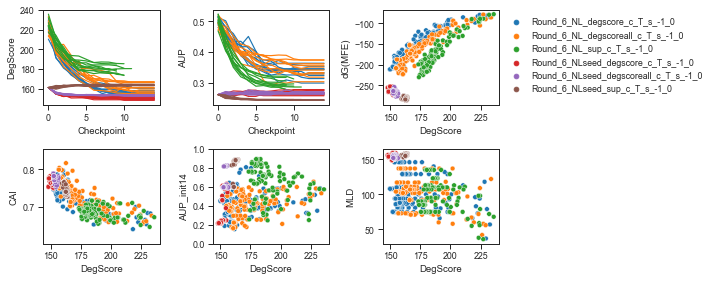

In [6]:
plt.figure(figsize=(10,4))
nrows, ncols = 2,3

plt.subplot(nrows,ncols,1)
for job in data.id.unique():
    tmp = data.loc[data.id==job]
    condition = tmp.condition.iloc[0]
    plt.plot(tmp.DegScore.values, color=palette[condition_list.index(condition)])
    
plt.ylabel('DegScore')
plt.xlabel('Checkpoint')

plt.subplot(nrows,ncols,2)
for job in data.id.unique():
    tmp = data.loc[data.id==job]
    condition = tmp.condition.iloc[0]
    plt.plot(tmp.AUP.values, color=palette[condition_list.index(condition)])
    
plt.ylabel('AUP')
plt.xlabel('Checkpoint')

plt.subplot(nrows, ncols, 3)
sns.scatterplot(x='DegScore',y='dG(MFE)', data=data, hue='condition',palette=palette)
plt.legend(bbox_to_anchor=(1,1), frameon=False)

plt.subplot(nrows, ncols, 4)
sns.scatterplot(x='DegScore',y='CAI', data=data, hue='condition',palette=palette)
plt.legend([], frameon=False)

plt.subplot(nrows, ncols, 5)
sns.scatterplot(x='DegScore',y='AUP_init14', data=data, hue='condition',palette=palette)
plt.legend([], frameon=False)
plt.ylim([0,1])

plt.subplot(nrows, ncols, 6)
sns.scatterplot(x='DegScore',y='MLD', data=data, hue='condition',palette=palette)
plt.legend([], frameon=False)

plt.tight_layout()

plt.savefig('%s_output.pdf' % keyword, bbox_inches='tight')

## Visualize structures

Generating RiboGraphViz for Round_6_NL_degscore_c_T_s_-1_0, 1/3
Generating RiboGraphViz for Round_6_NL_degscore_c_T_s_-1_0, 2/3
Generating RiboGraphViz for Round_6_NL_degscore_c_T_s_-1_0, 3/3
Generating RiboGraphViz for Round_6_NL_degscoreall_c_T_s_-1_0, 1/3
Generating RiboGraphViz for Round_6_NL_degscoreall_c_T_s_-1_0, 2/3
Generating RiboGraphViz for Round_6_NL_degscoreall_c_T_s_-1_0, 3/3
Generating RiboGraphViz for Round_6_NL_sup_c_T_s_-1_0, 1/3
Generating RiboGraphViz for Round_6_NL_sup_c_T_s_-1_0, 2/3
Generating RiboGraphViz for Round_6_NL_sup_c_T_s_-1_0, 3/3
Generating RiboGraphViz for Round_6_NLseed_degscore_c_T_s_-1_0, 1/3
Generating RiboGraphViz for Round_6_NLseed_degscore_c_T_s_-1_0, 2/3
Generating RiboGraphViz for Round_6_NLseed_degscore_c_T_s_-1_0, 3/3
Generating RiboGraphViz for Round_6_NLseed_degscoreall_c_T_s_-1_0, 1/3
Generating RiboGraphViz for Round_6_NLseed_degscoreall_c_T_s_-1_0, 2/3
Generating RiboGraphViz for Round_6_NLseed_degscoreall_c_T_s_-1_0, 3/3
Generating Ri

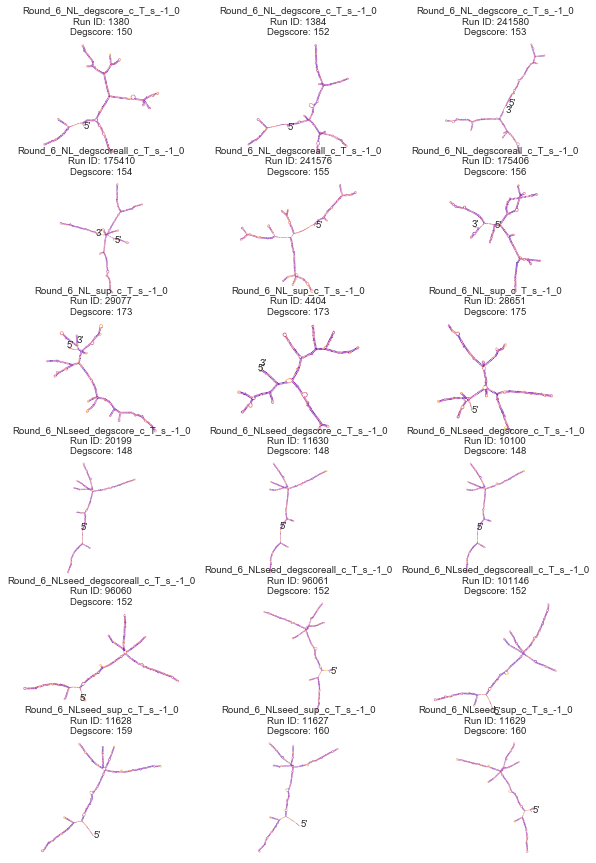

In [7]:
n_rows = len(condition_list)

plt.figure(figsize=(10,15))

for cond_ind, condition in enumerate(condition_list):
    
    tmp = data.loc[data.condition==condition]
    tmp = tmp.sort_values('DegScore')
    tmp = tmp.drop_duplicates('id')
    
    for i in range(3):
        plt.subplot(n_rows, 3, cond_ind*3+i+1)

        print('Generating RiboGraphViz for %s, %d/3' % (condition, i+1))

        struct = tmp.iloc[i]['MFE Structure']
        seq = tmp.iloc[i]['full_sequence']
            
        mdl = DegScore(seq, structure=struct)
        degscore_vector = mdl.degscore_by_position
     
        rgv_object = RGV(struct)
        rgv_object.draw(c=degscore_vector)
        
        plt.title("%s\nRun ID: %s\nDegscore: %d" % (condition, tmp.iloc[i]['id'], tmp.iloc[i]['DegScore']))

plt.savefig('%s_best_3_from_each_condition.pdf' % keyword, bbox_inches='tight')